#  K-means Clustering & finding the optimum number of clusters
Nidhi Ravi Nair

10/11/2020

# Introduction :
The Iris dataset contains the data for 50 flowers from each of the 3 species - Setosa, Versicolor and Virginica

So in total we have 150 observations with 6 columns (Id, Sepal-width , Sepal-length, Petal-width , Petal-length and Species).

The data gives the measurements in centimeters of the variables sepal length and width & petal length and width for each of the flowers.

Goal of the study is to perform exploratory analysis on the data ,find the optimum number of clusters and build a K-means clustering model to cluster them into groups. 

Here I  have assumed that I do not have the species column to form clusters and then used it to check our model performance!


In [1]:
iris<-read.csv(file.choose())
dim(iris)

[1] 150   6

As mentioned before there are 150 observations 6 columns 

In [3]:
attach(iris)
library(ggplot2) 

The following objects are masked from iris (pos = 4):

    Id, PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalWidthCm,
    Species




In [23]:
iris.features<-iris
iris.features$Species=NULL
iris.features$Id=NULL
iris.features

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2


# Exploratory Data Analysis

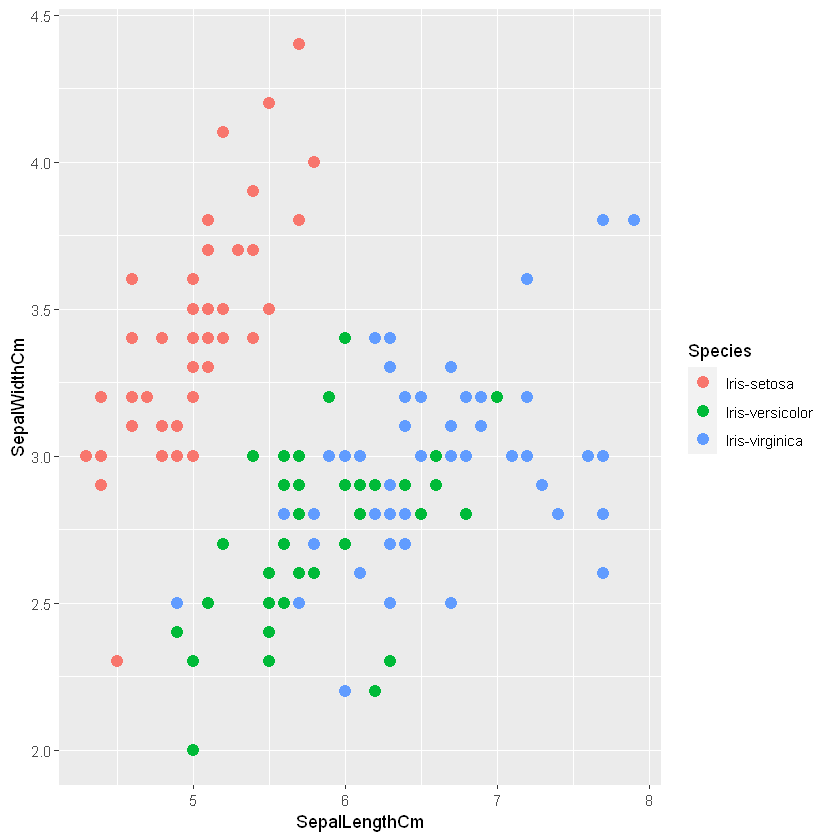

In [5]:
ggplot(data=iris, aes(x=SepalLengthCm, y=SepalWidthCm, color=Species)) + geom_point(size=3)

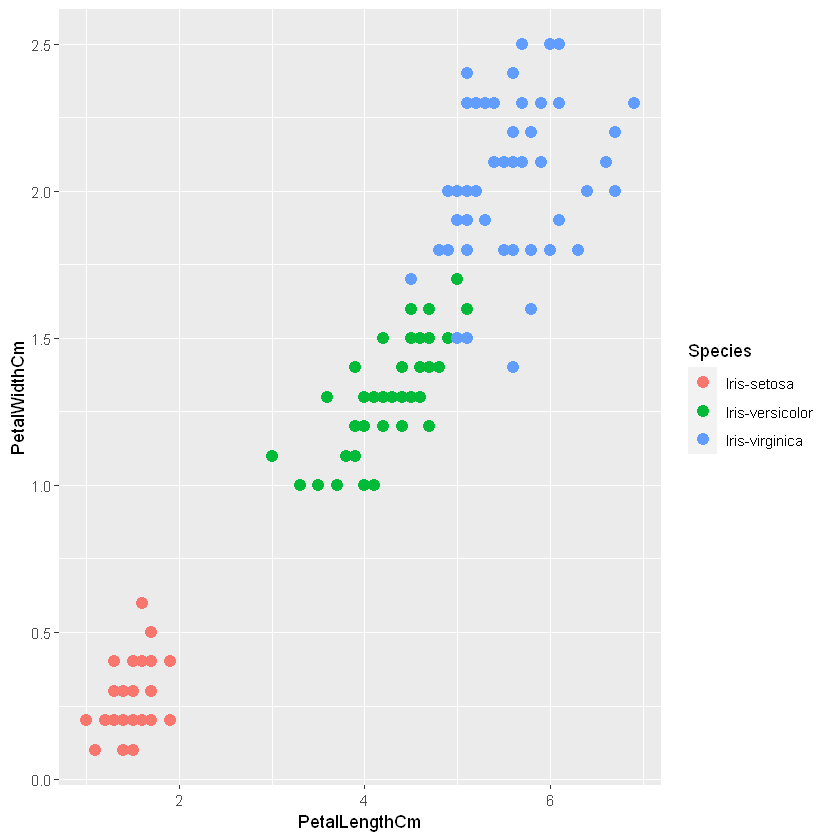

In [6]:
ggplot(data=iris, aes(x=PetalLengthCm, y=PetalWidthCm, color=Species)) + geom_point(size=3)

From the plot we can make out that , there are basically clusters which can be formed based on petal length and petal width.

# Finding Optimum Number of Clusters

In [7]:
set.seed(200)
k.max <- 10
wss<- sapply(1:k.max,function(k){kmeans(iris.features,k,nstart = 20,iter.max = 20)$tot.withinss})
wss

[1] 680.82440 152.36871  78.94084  57.31787  46.53558  38.93096  34.18921
 [8]  32.07471  27.83959  26.04820

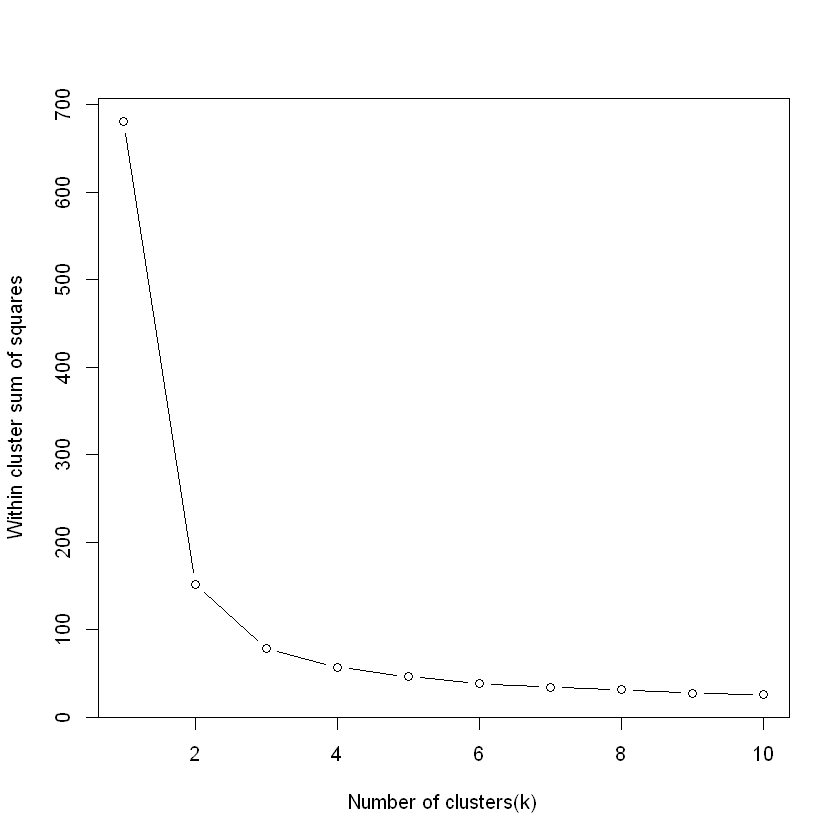

In [8]:
plot(1:k.max,wss, type= "b", xlab = "Number of clusters(k)", ylab = "Within cluster sum of squares")

 The plot of Within cluster sum of squares vs the number of clusters show us an elbow point at 3. So, we can conlude that 3 is the best value for k to be used to create the final model.

# Final Cluster Model
The final model is builtusing kmeans and k = 3. The nstartvalue will be set as 20 which means that R will try 20 different random starting assignments and then select the one with the lowest within cluster variation.

In [12]:
km<-kmeans(iris.features,3,nstart = 20)
km

K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1      5.006000     3.418000      1.464000     0.244000
2      6.850000     3.073684      5.742105     2.071053
3      5.901613     2.748387      4.393548     1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.24040 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

We can see that the "within cluster sum of squares by cluster " is 88.4% , from which we can conclude that the model is able to capture atleast 88.4% of the variablity in the data, which indicates that the model performance is good .

#(higher the value of the "Within cluster sum of squares by cluster" means better the quality of model)


In [13]:
table(iris$Species,km$cluster)
write.csv(km$cluster,file="iris.csv")

                 
                   1  2  3
  Iris-setosa     50  0  0
  Iris-versicolor  0  2 48
  Iris-virginica   0 36 14

From the table we can see most of the observations have been clustered correctly however, 2 of the versicolor have been put in the cluster with all the virginica and 14 of the verginica have been put in cluster  with all the versicolor.


Now lets plot the points using the cluster formed by our model and also with actual "species" colummn values and find out our model performance visually  

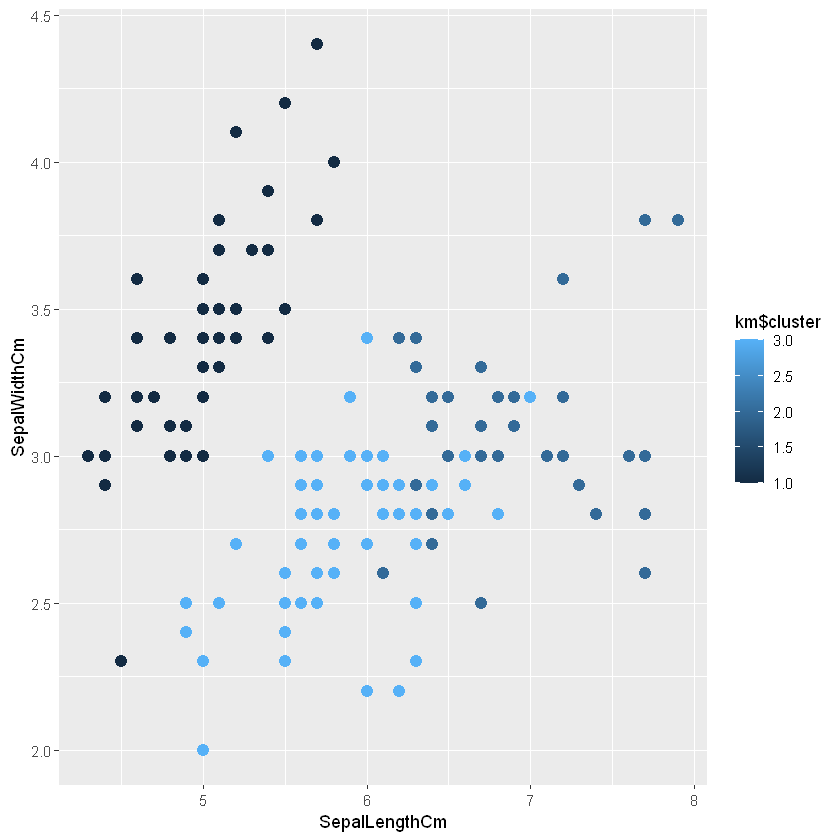

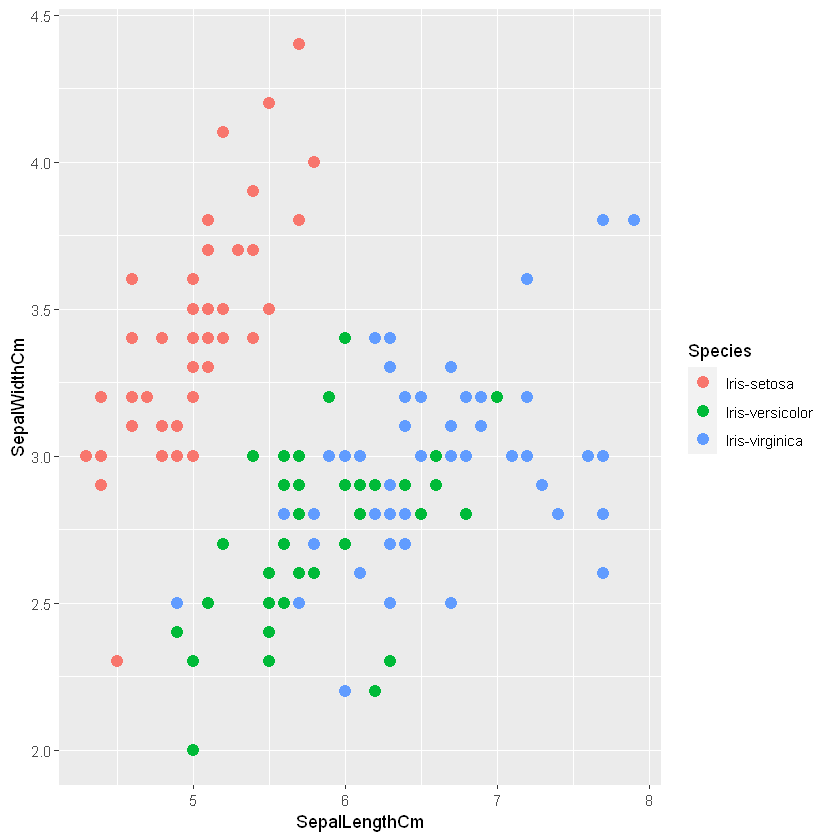

In [15]:
ggplot(data=iris, aes(x=SepalLengthCm, y=SepalWidthCm, color=km$cluster)) + geom_point(size=3)
ggplot(data=iris, aes(x=SepalLengthCm, y=SepalWidthCm, color=Species)) + geom_point(size=3)

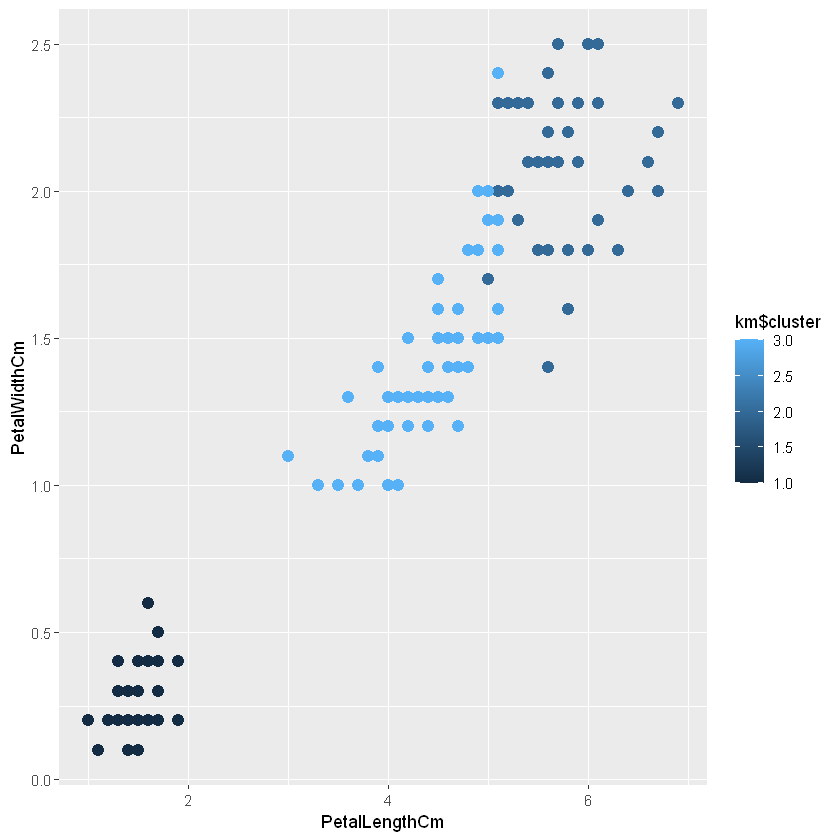

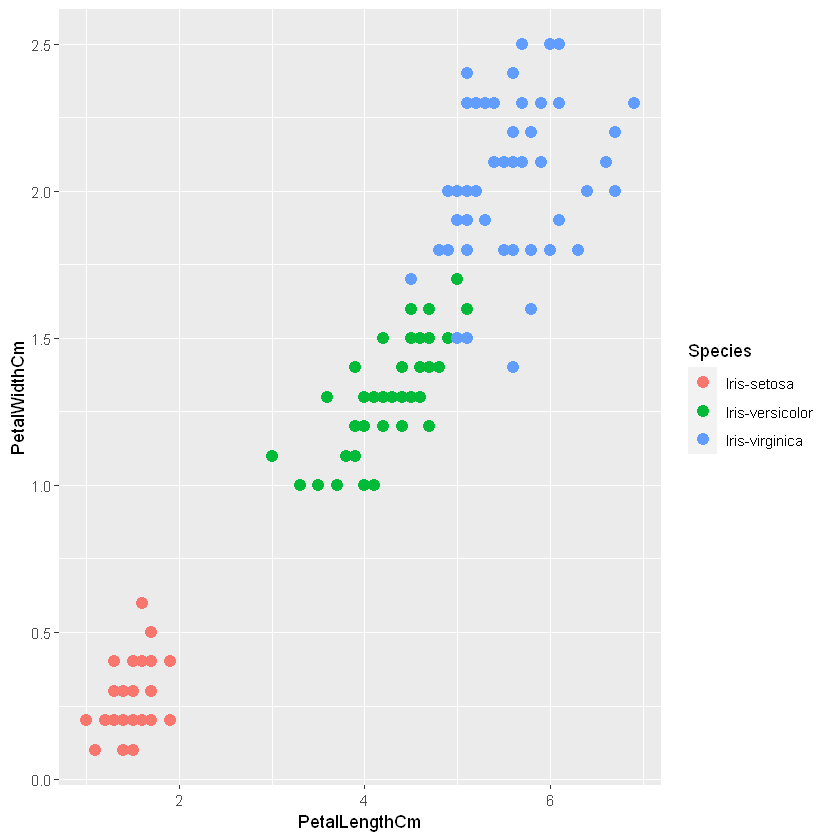

In [16]:
ggplot(data=iris, aes(x=PetalLengthCm, y=PetalWidthCm, color=km$cluster)) + geom_point(size=3)
ggplot(data=iris, aes(x=PetalLengthCm, y=PetalWidthCm, color=Species)) + geom_point(size=3)


We can see that the clusters formed by our  model are not much different than the actual species specified .
So visually we can say that our model has performed really well in forming the clusters and indentifying  the species.

Now to statistically prove our visually subjective  analysis , we will use Silhouette values method . 

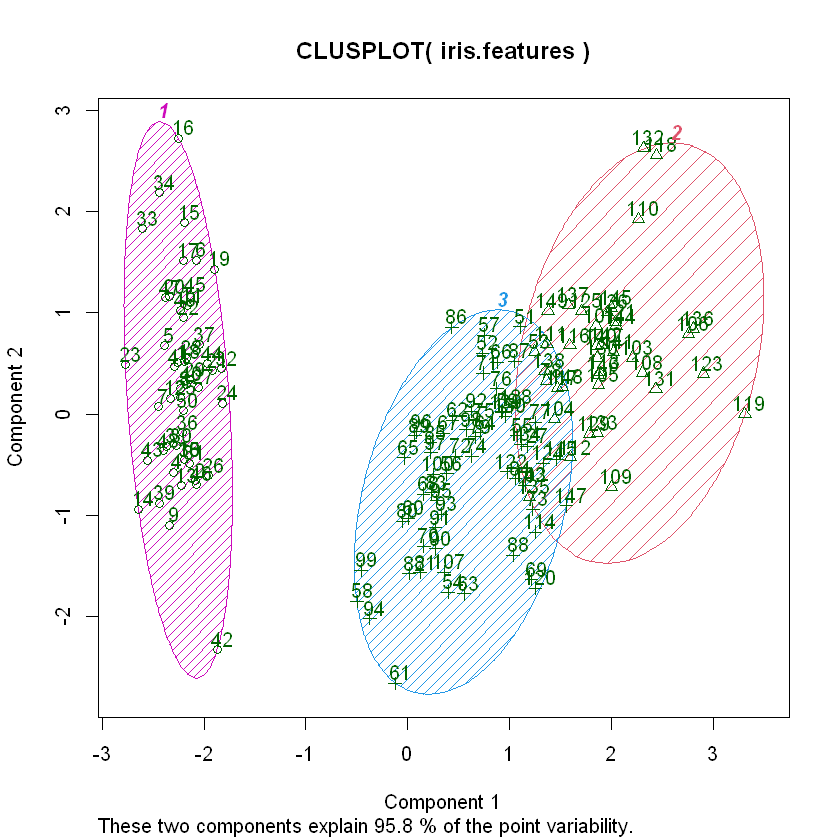

In [17]:
library(cluster)
clusplot(iris.features,km$cluster,color=TRUE,shade=TRUE,labels=2,lines=0)

We can see the setosa cluster perfectly explained, meanwhile virginica and versicolor have a little noise between their clusters.

The main objective of plot the cluster plot is to see whether there is any overlapping .If there is overlapping
that means the model got confused for those observations and was not able to decide in which cluster they should be included 

This can be seen, when we calculate the silhouette values.

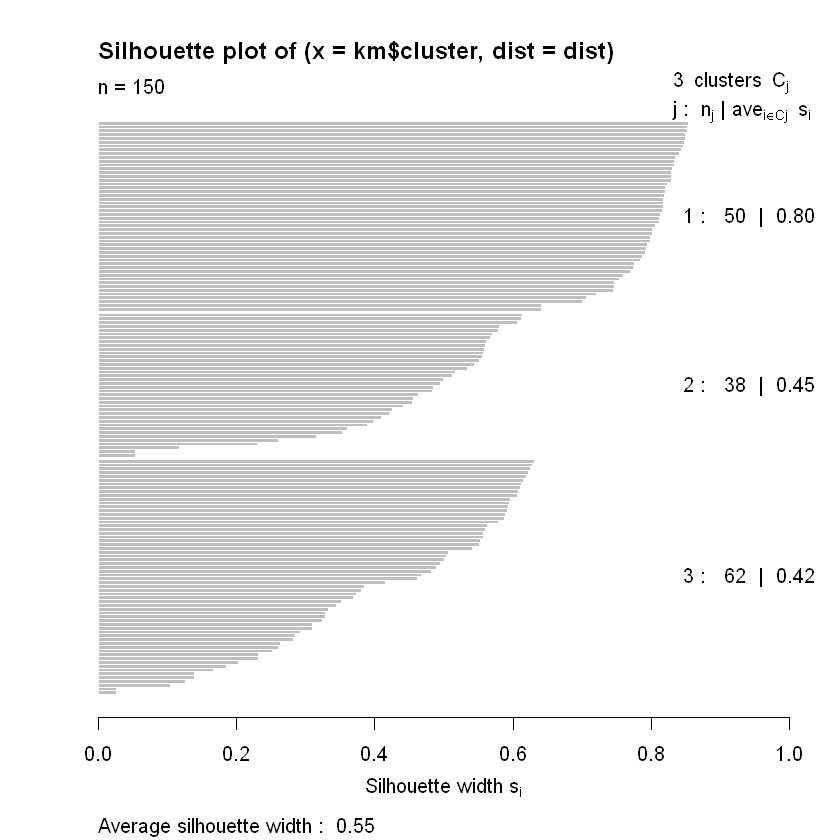

In [20]:
dist<-dist(iris.features,method="euclidean")

sil<-silhouette(km$cluster,dist)
plot(sil)

# Model Evaluation and Performance Evaluation
Total obsevations are 150. 
The values towards the positive side represent the better silhouette value
The values closer to 0 represent weak assignment 
The values towards the negative side represent the misclassification 

The goodness of the cluster can be measured by the average silhouette value 
Cluster 1: has 50 obv. , Avg Silhouette value: 0.80 (Good Cluster --> almost similar obvs have been clubbed together, most of the values have the silhouette value 0.7/0.8)

Cluster 2: has 38 obv. , Avg silhouette value: 0.45 (Good enough Cluster-->most of the values have the silhouette values 0.4/0.5)

Cluster 3: has 62 obv. , Avg Silhouette value: 0.42 (Good enough Cluster--> most of the values have the silhouette value 0.5)


Average Silhouette width : 0.55 , which represents that the quality of clusters are good 
